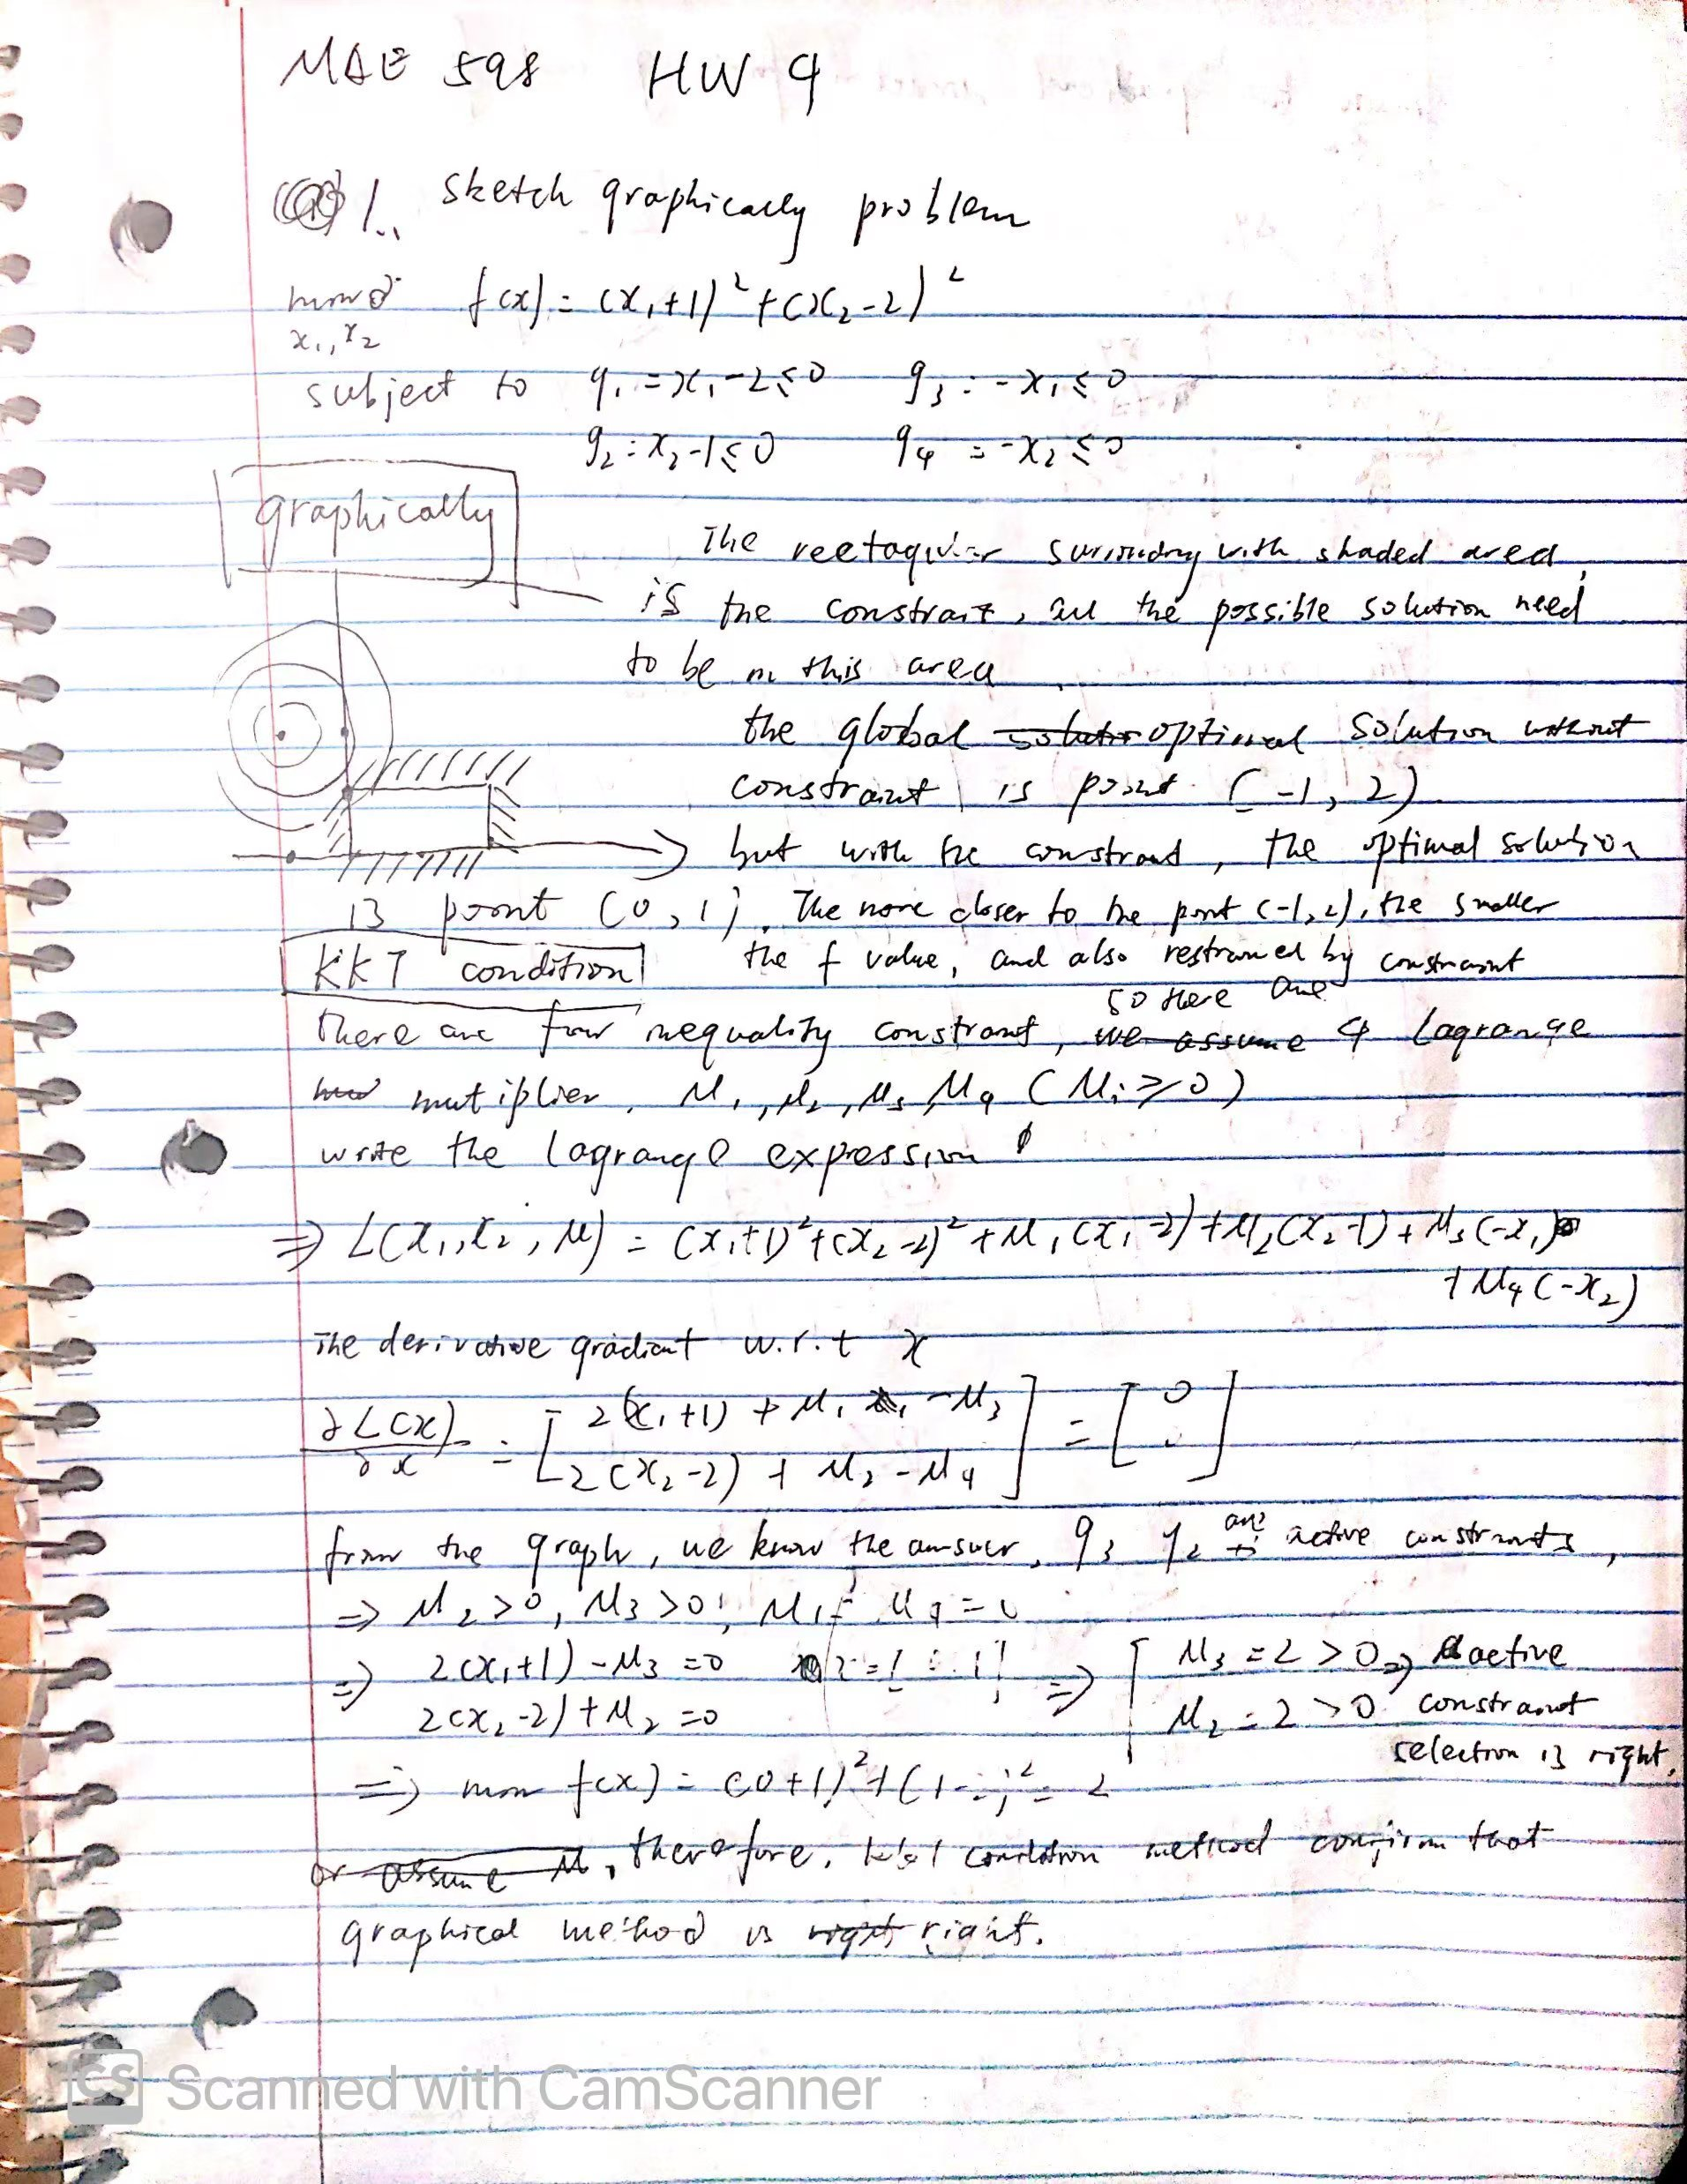

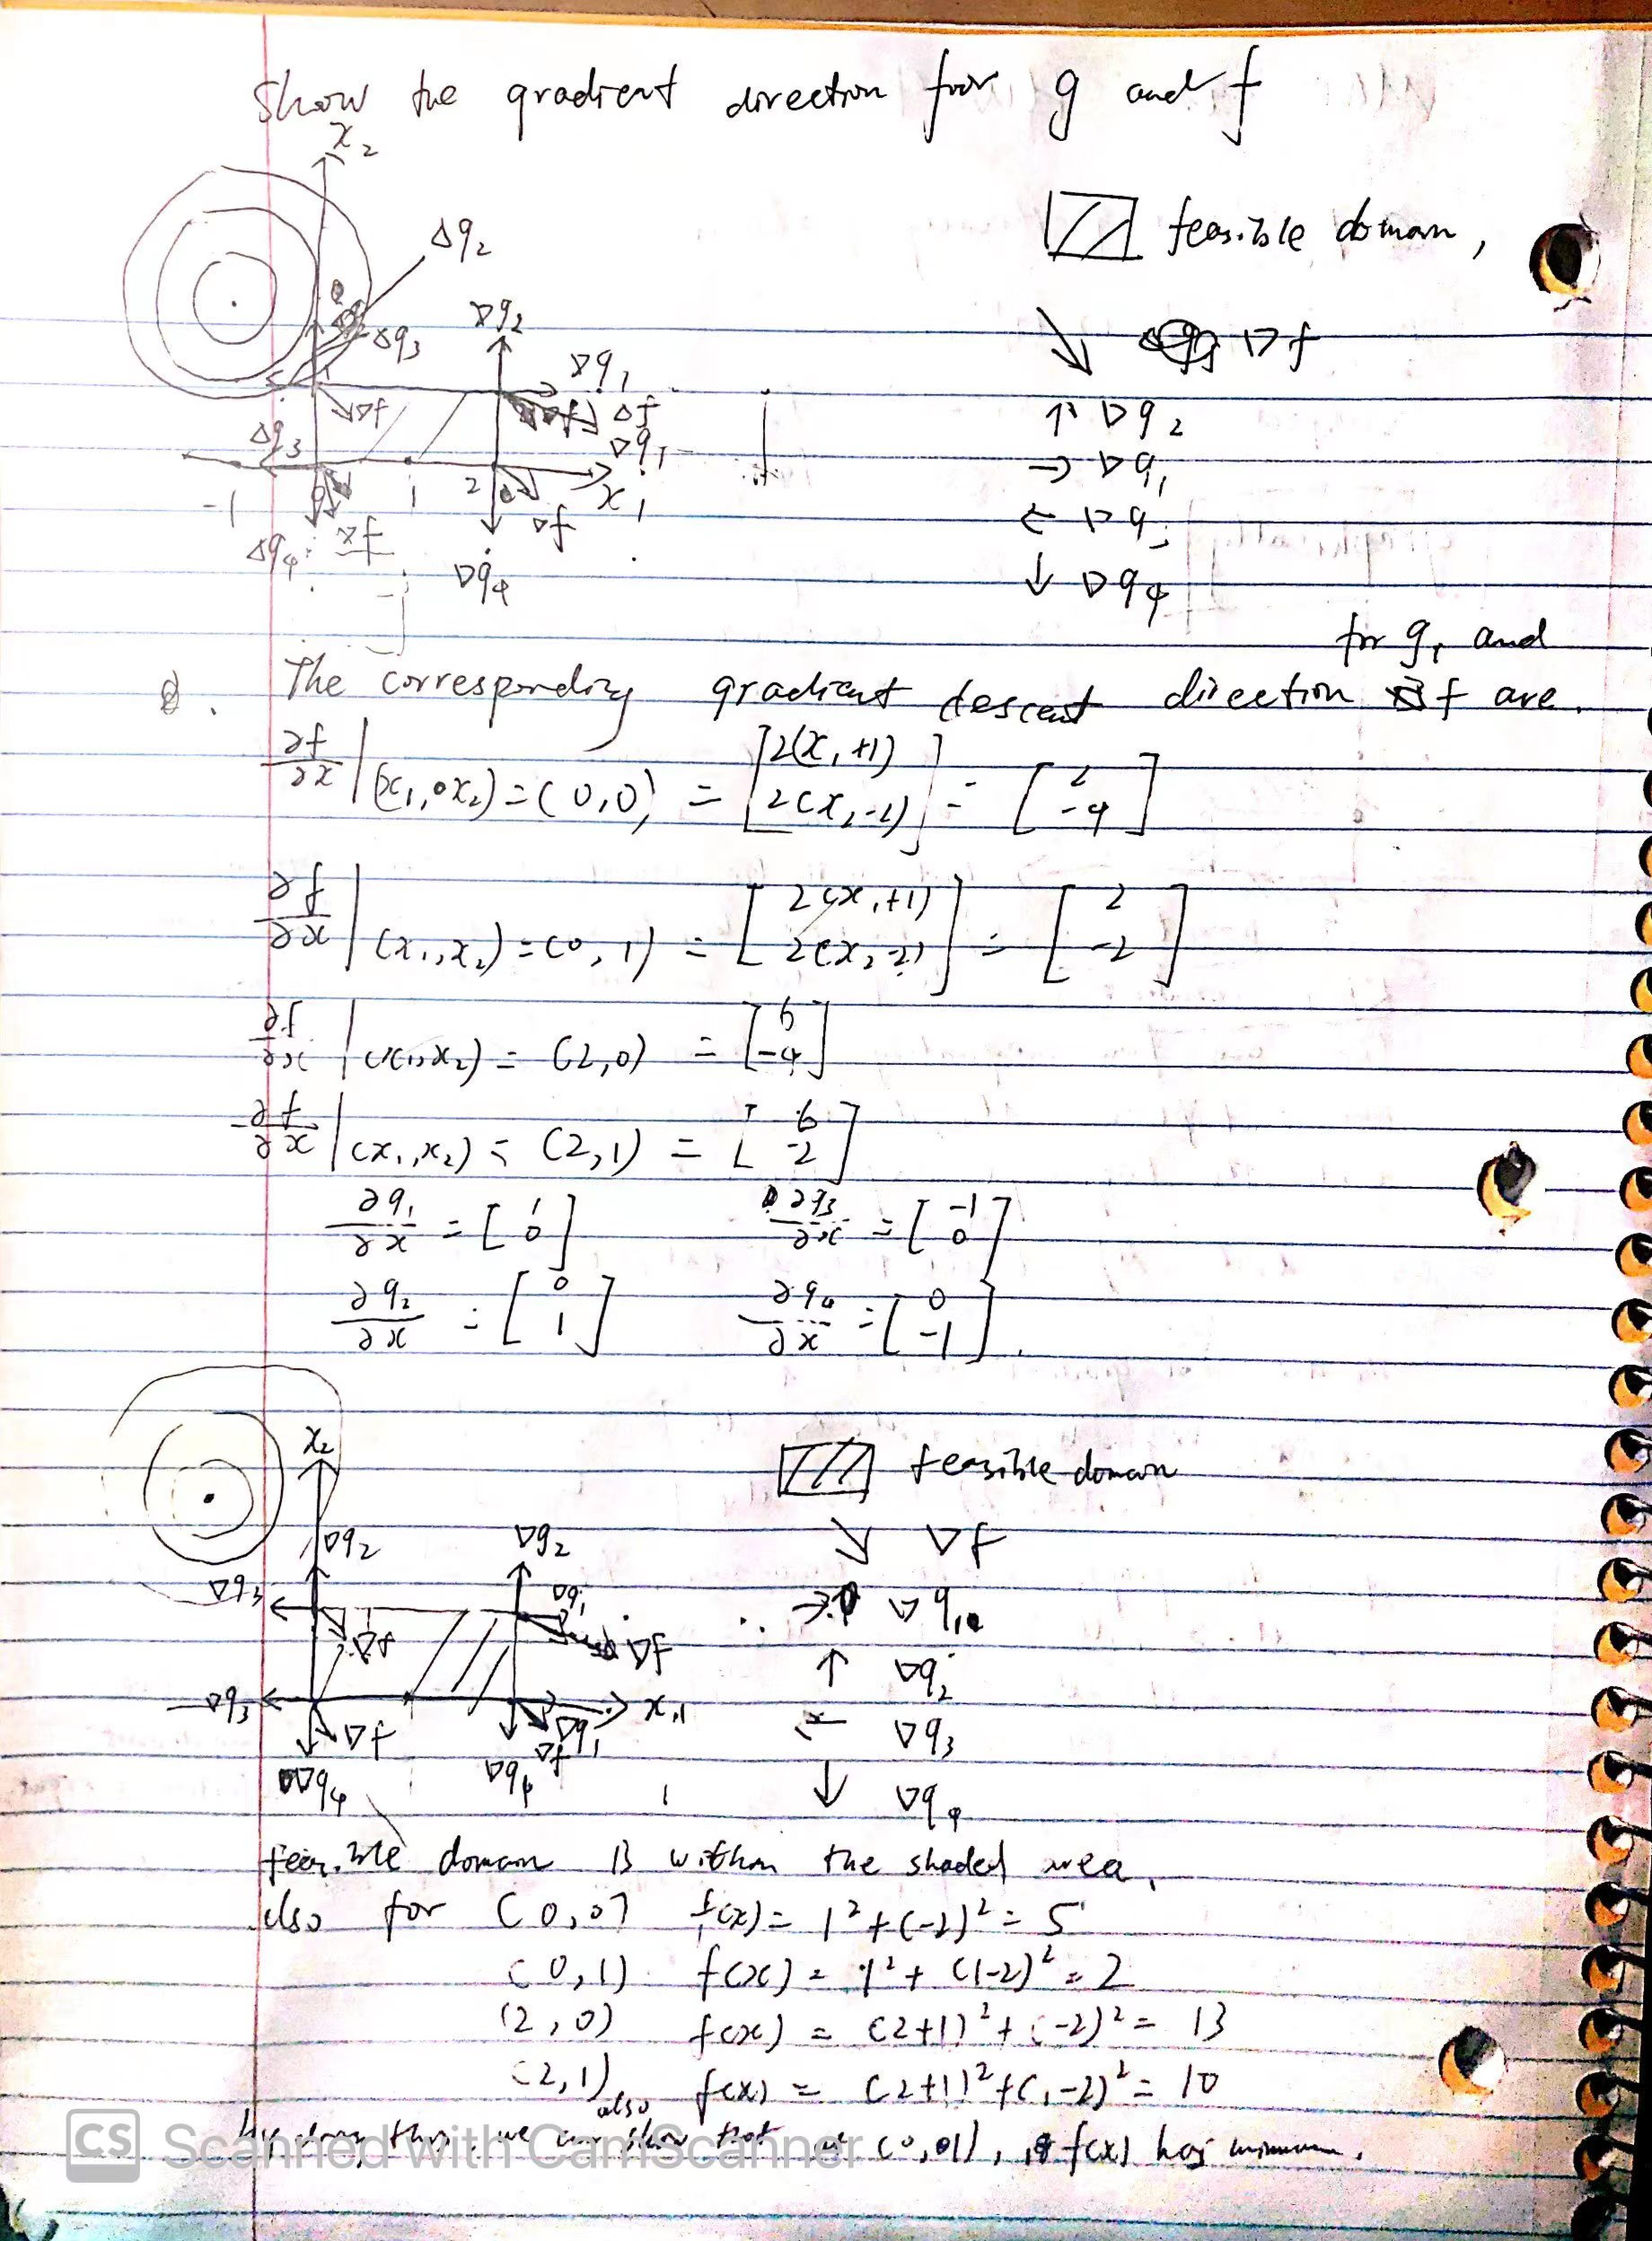

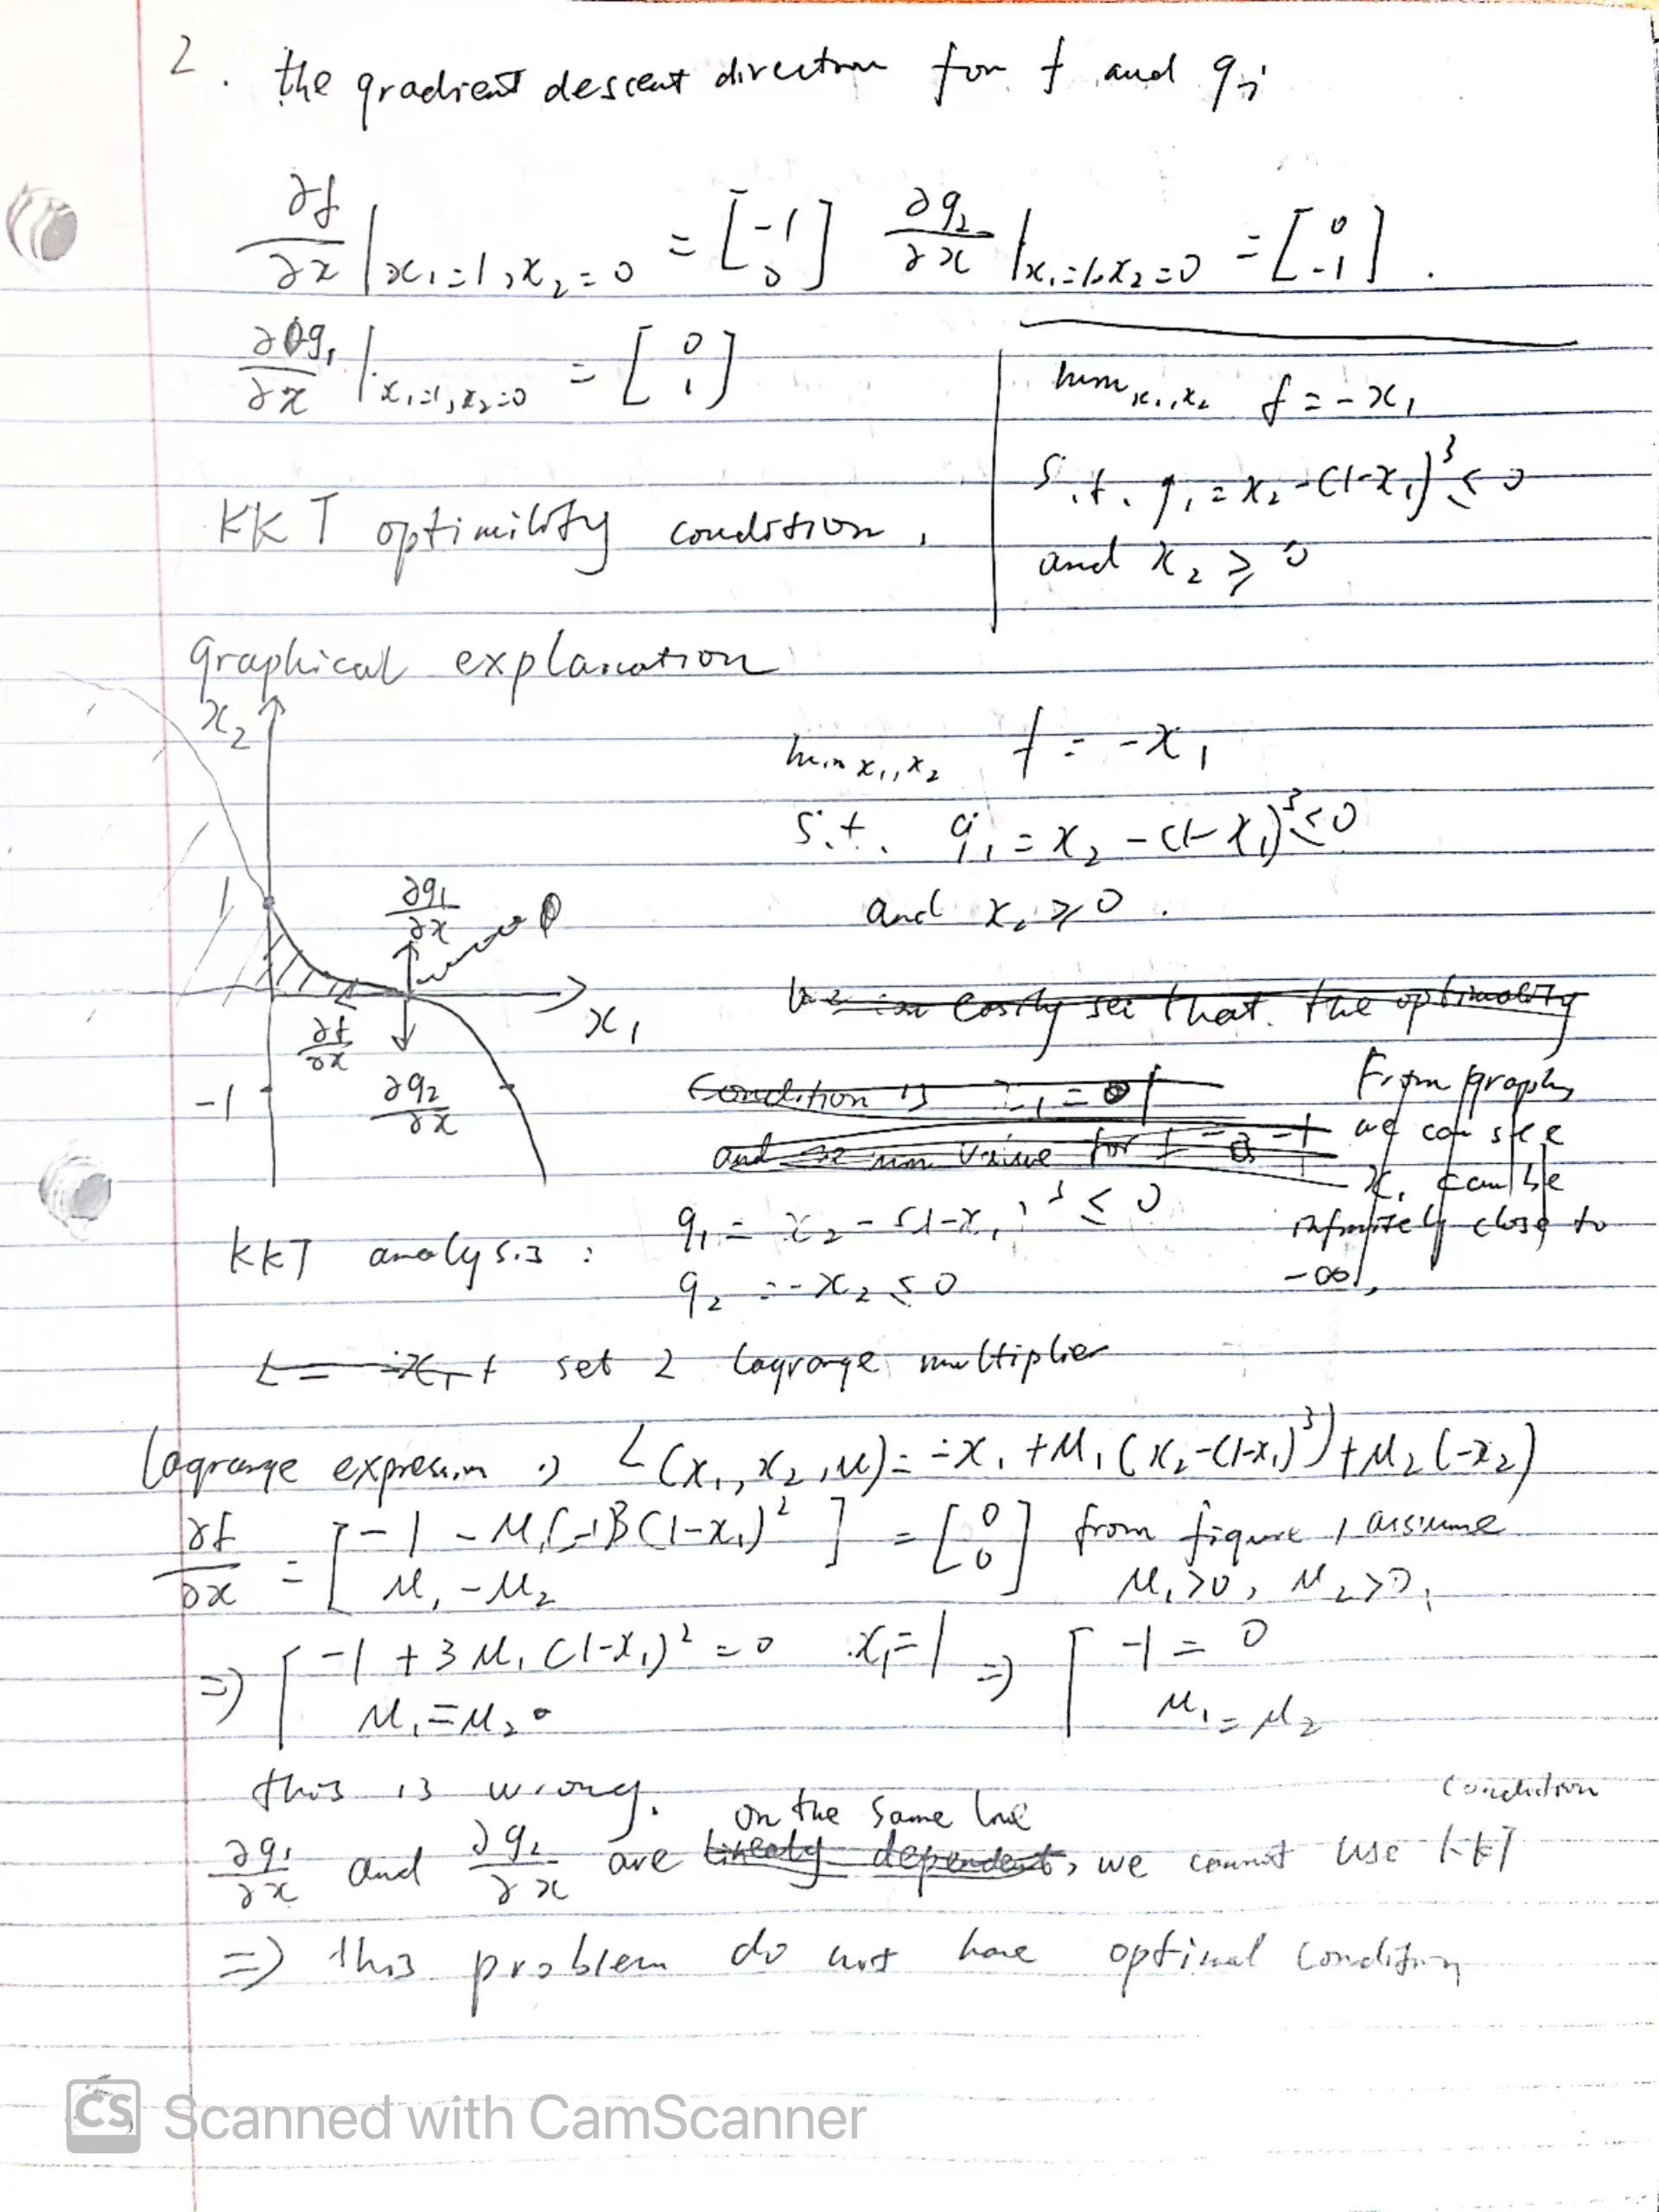

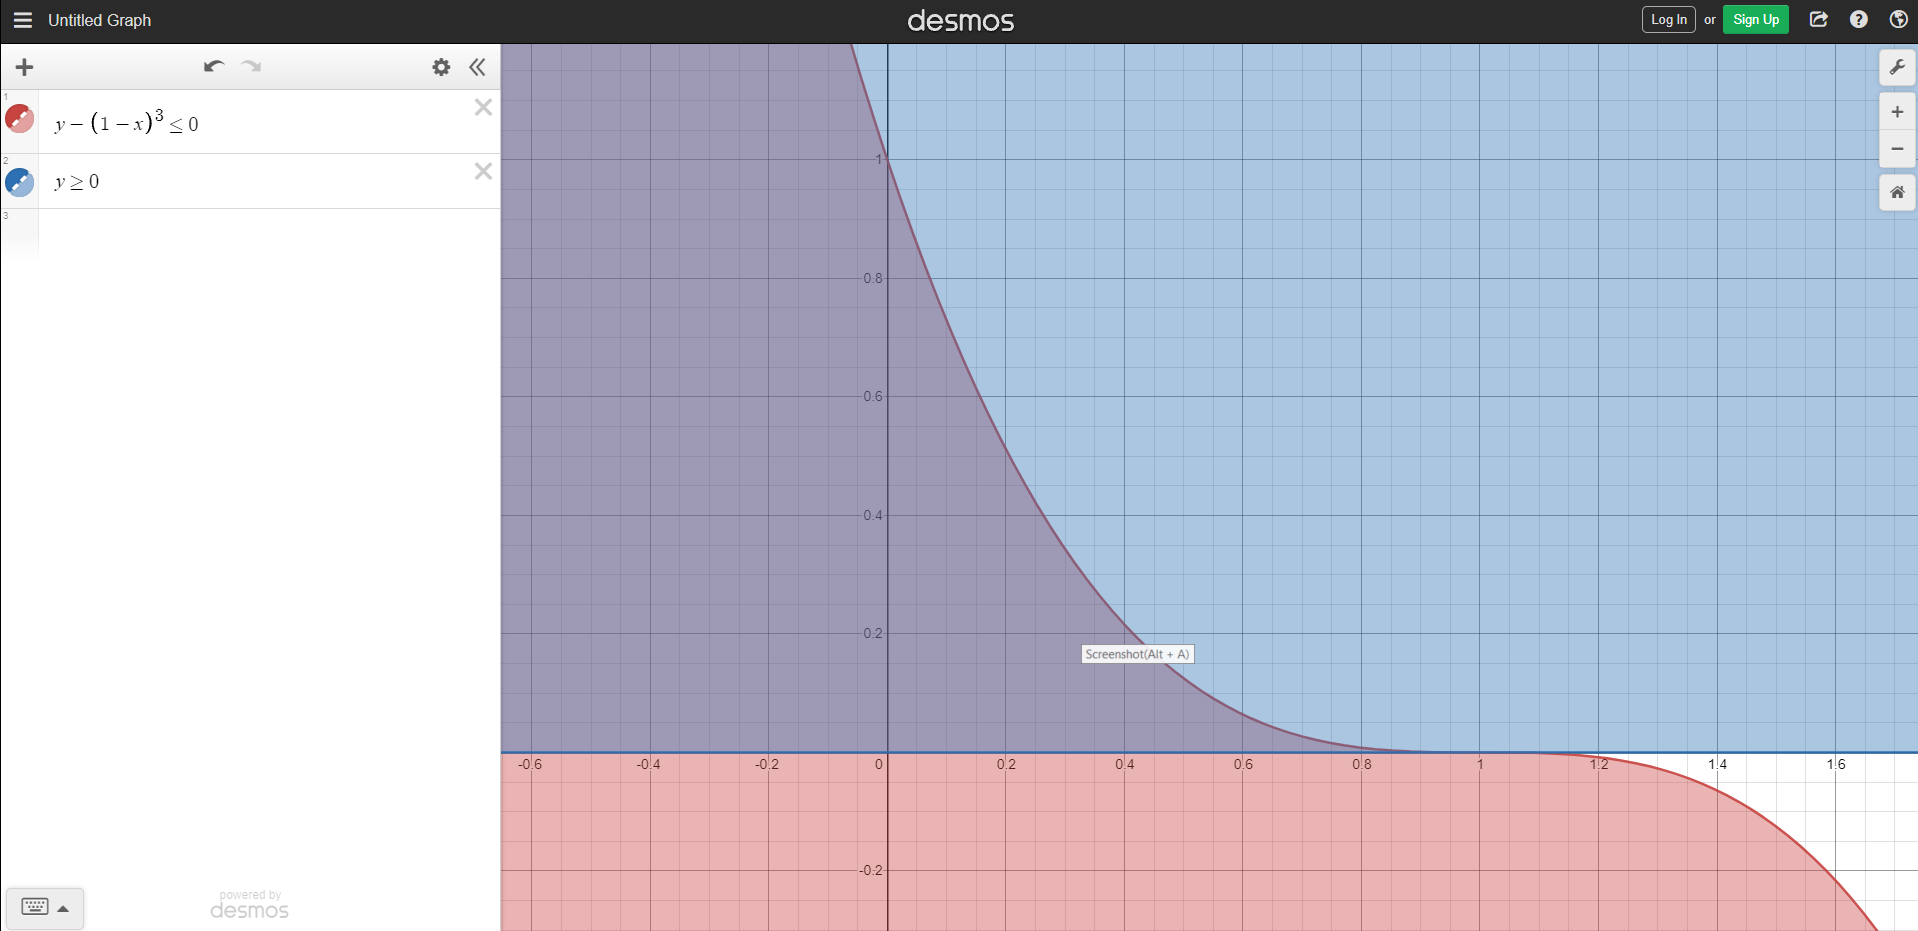

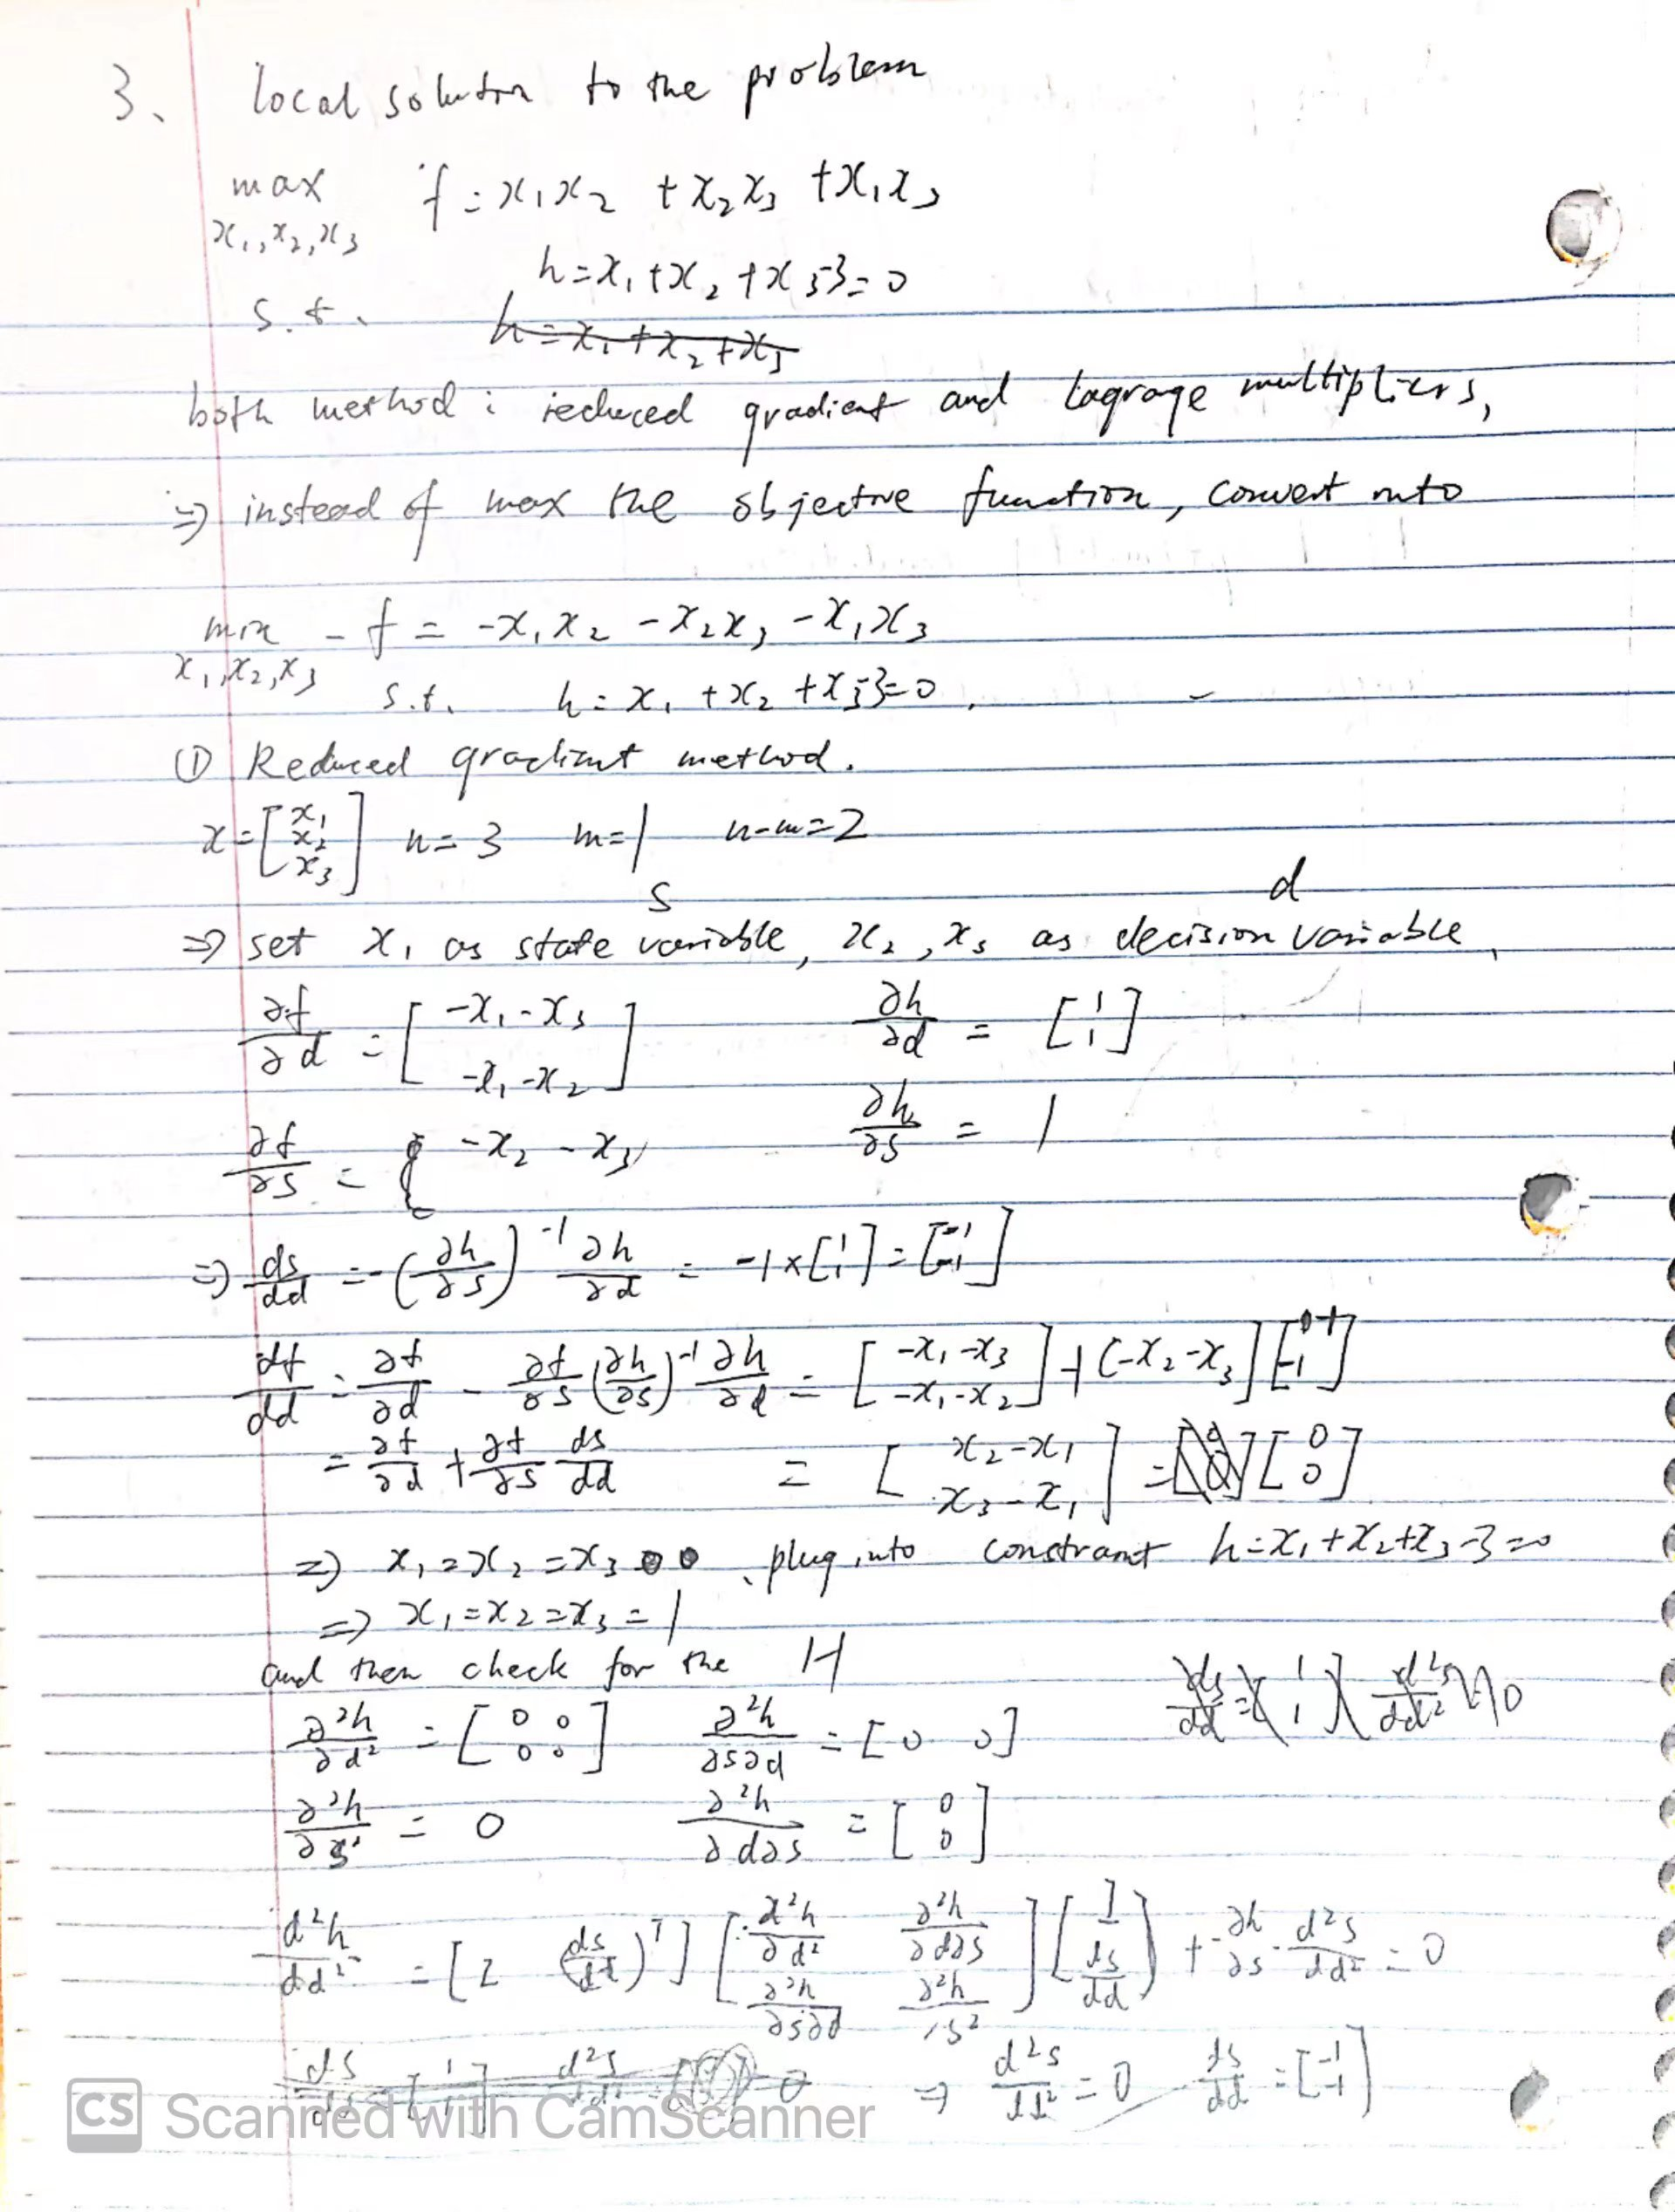

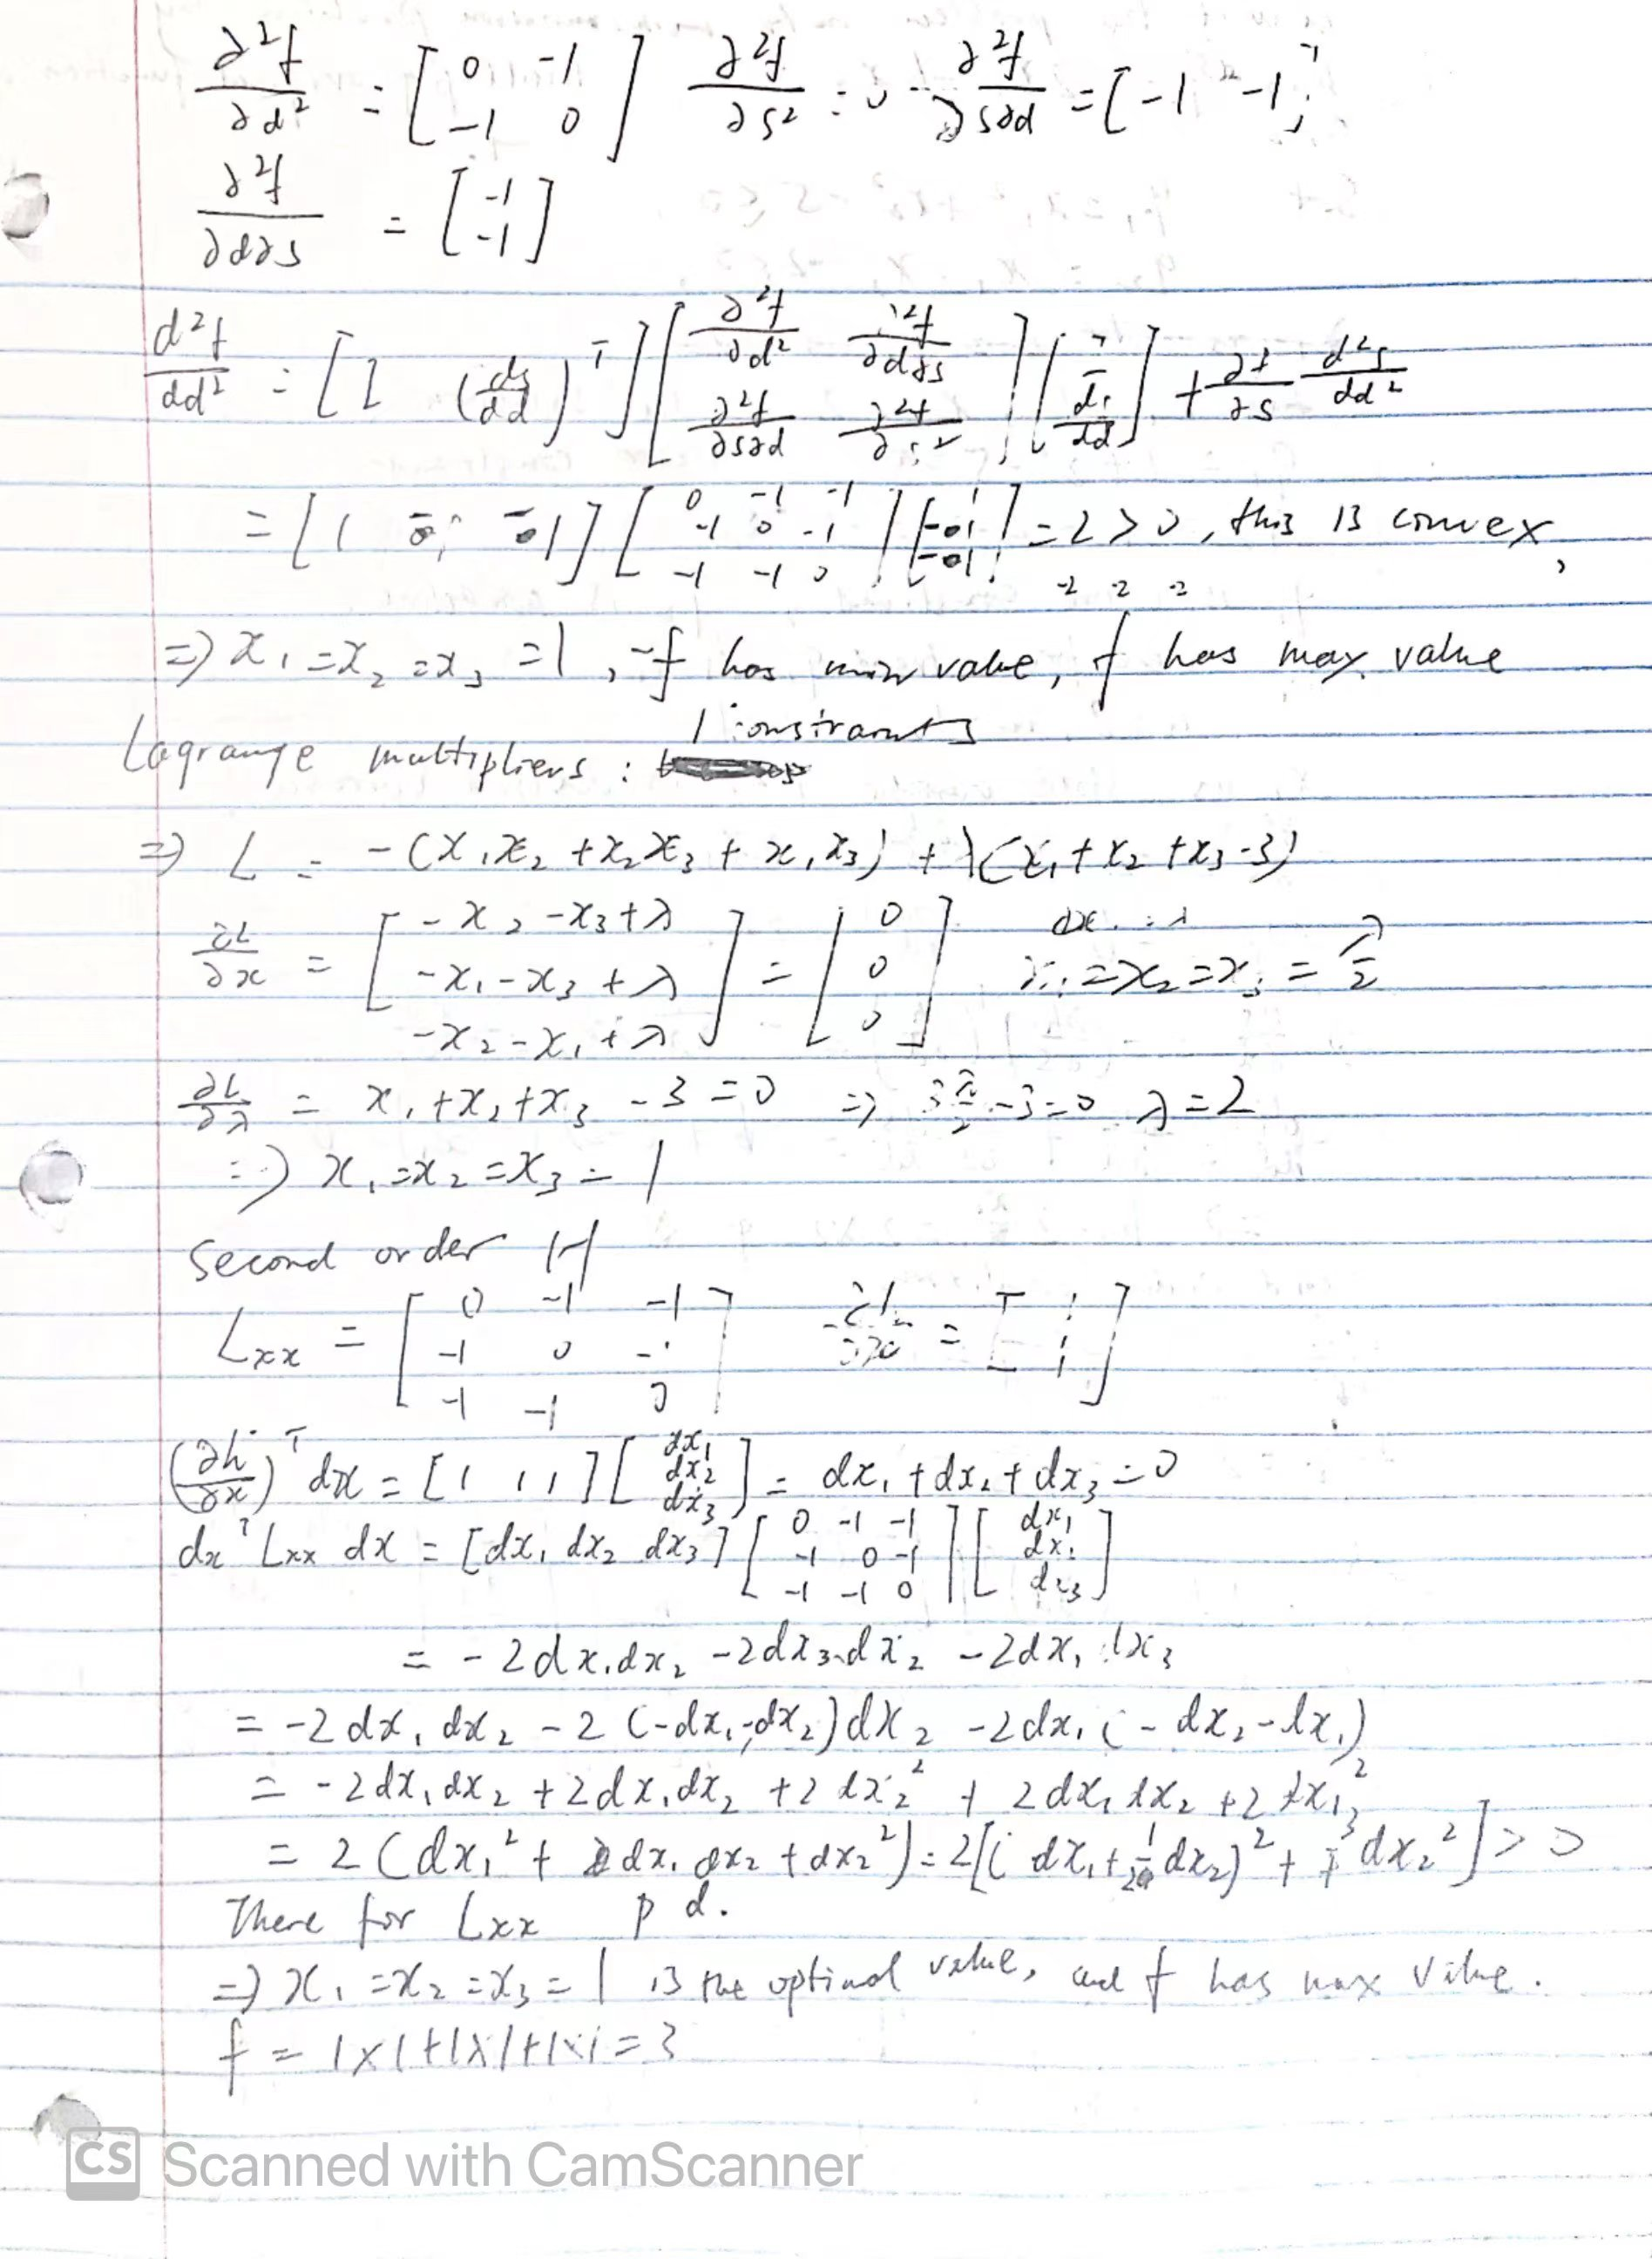

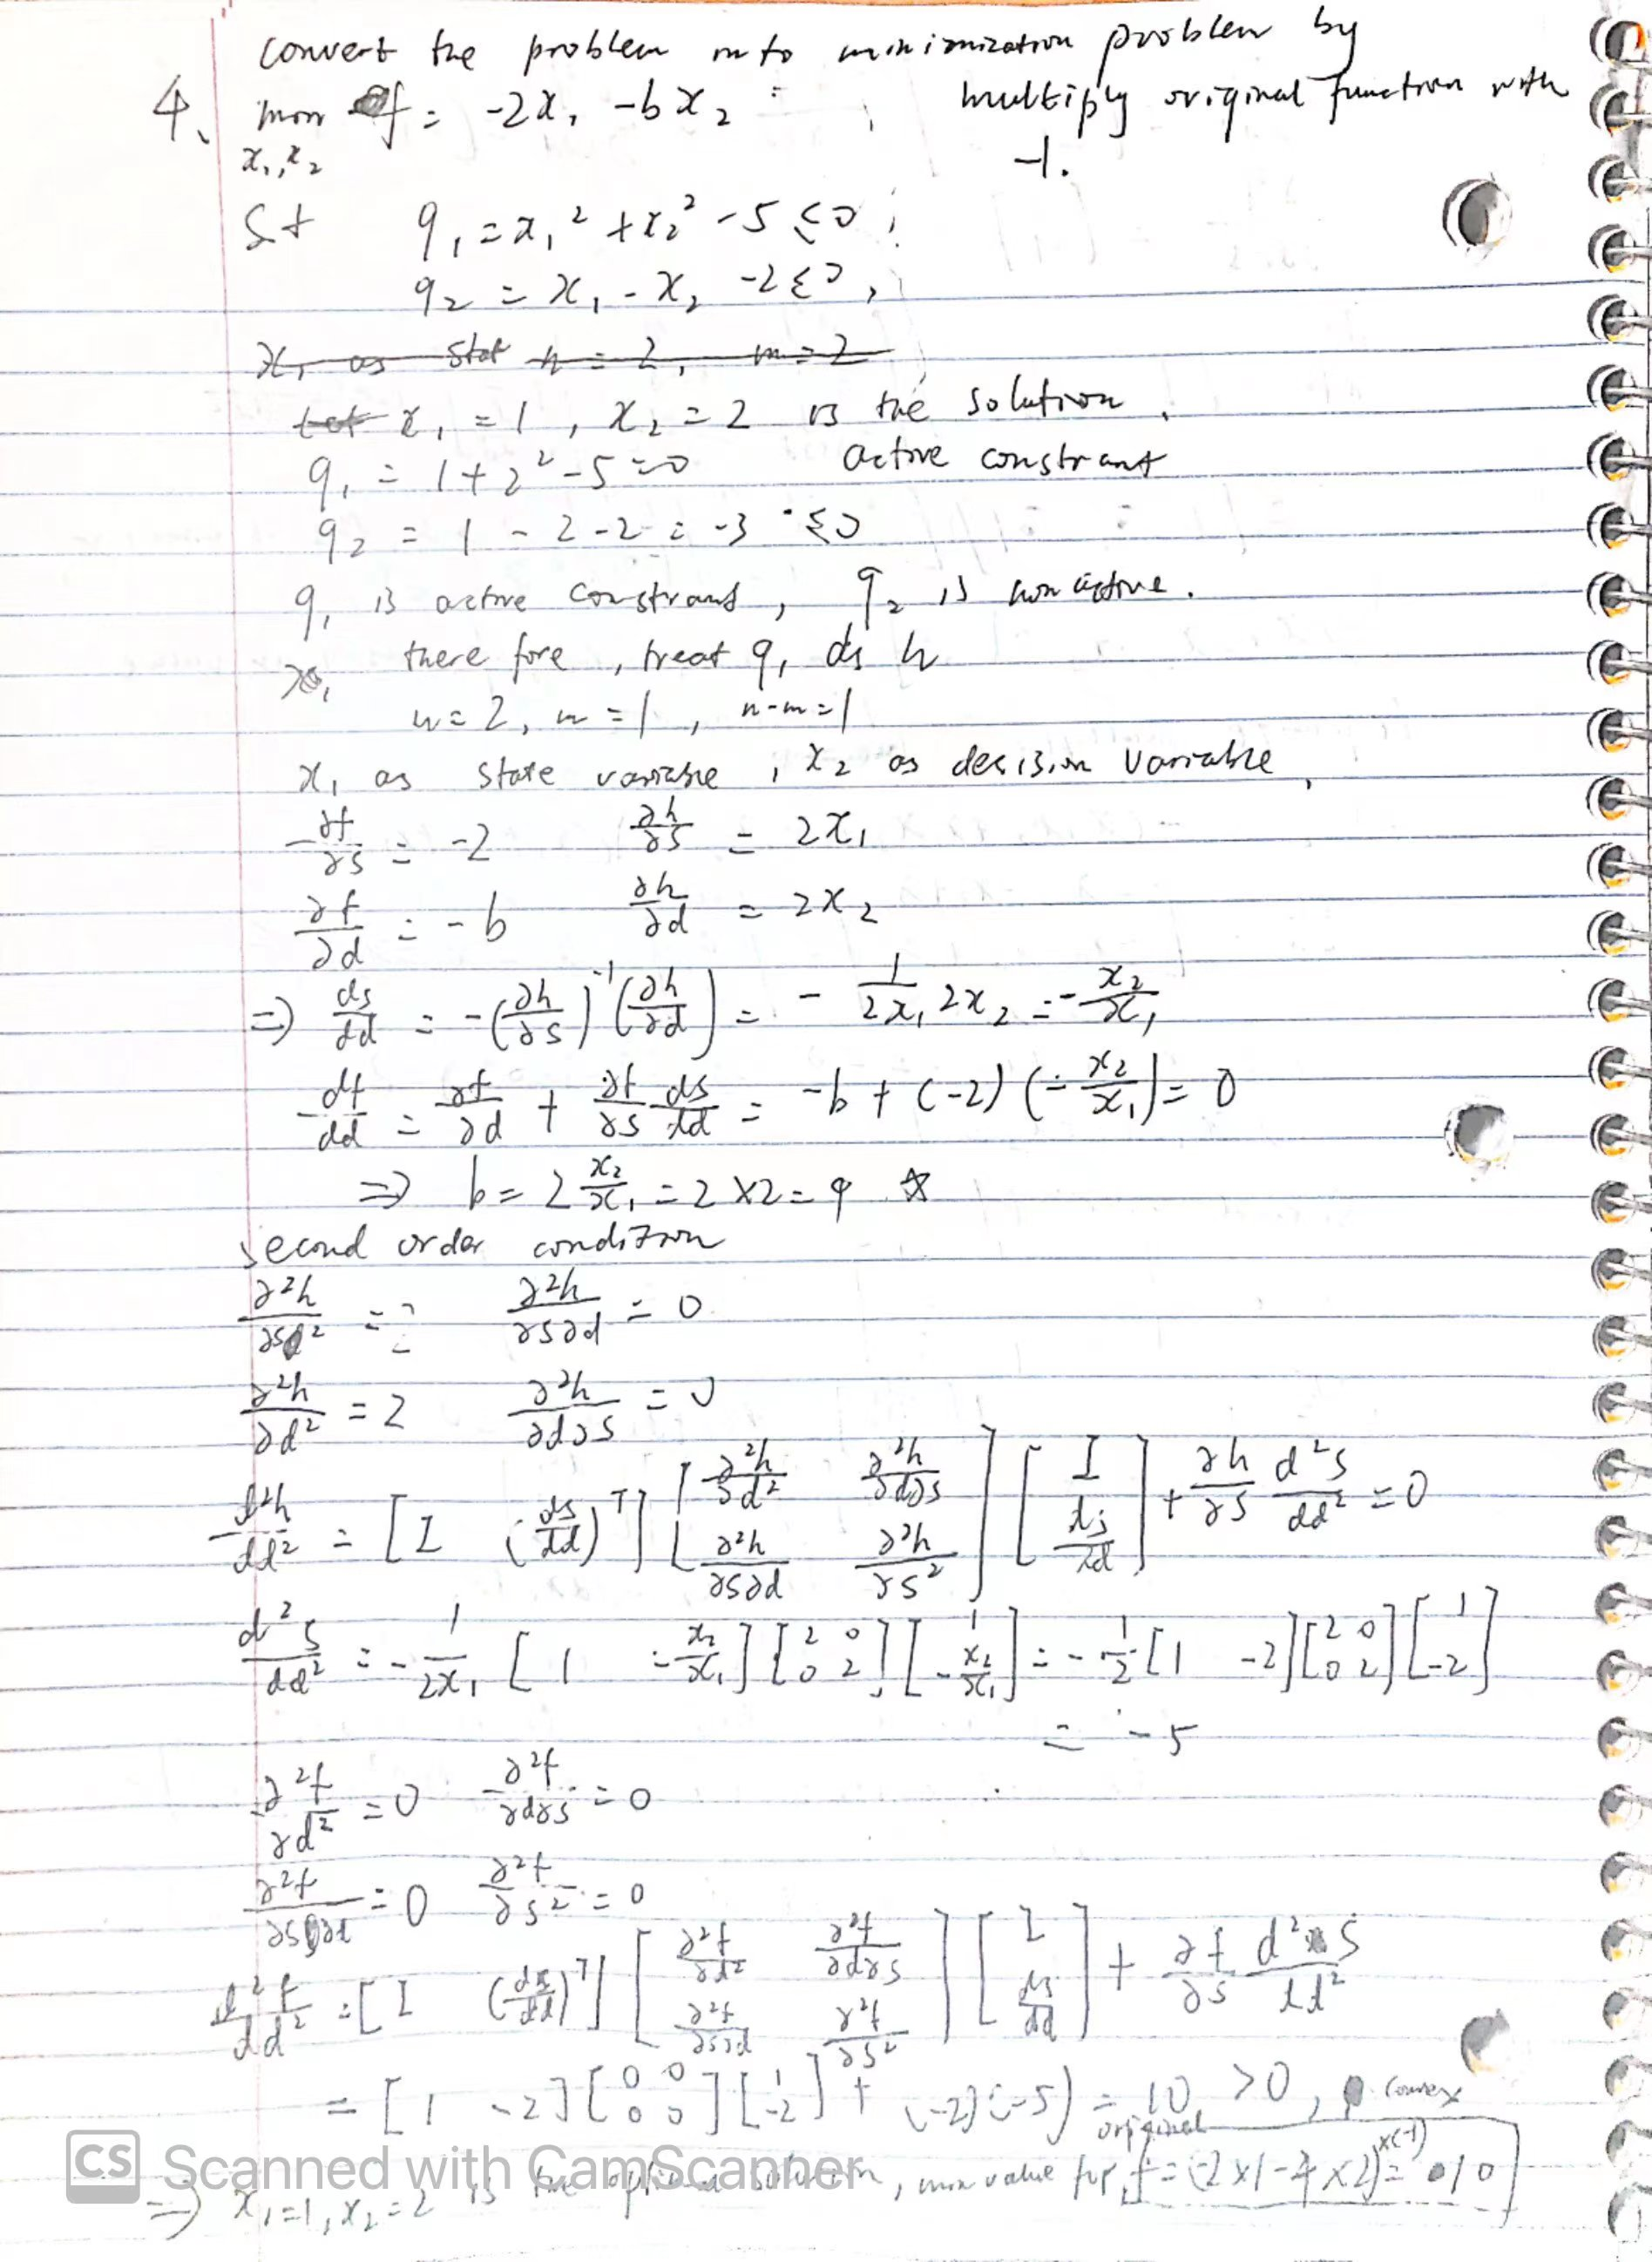

In [100]:
import numpy as np
## two constraint, so m=2
##three independent variable n=3
##let x2,x3 as state variable.
##Let x1 as decision variable


def obj(x):
    x1=x[0]
    x2=x[1]
    x3=x[2]
    return x1 ** 2 + x2 ** 2 + x3 ** 2

def af_ax(x):
    x1=x[0]
    x2=x[1]
    x3=x[2]
    af_as = np.array((2*x2, 2*x3))
    af_ad = np.array([2 * x1])
    return af_as, af_ad

def constraint(x):
    x1=x[0]
    x2=x[1]
    x3=x[2]
    h1 = x1 ** 2 / 4 + x2 ** 2 / 5 + x3 ** 2 / 25 - 1
    h2 = x1 + x2 - x3
    return h1, h2

def ah_ax(x):
    x1=x[0]
    x2=x[1]
    x3=x[2]
    ah_as = np.matrix([[(2/5) * x2, (2/25) * x3], [1, -1]])
    #ah_as = np.vstack((np.hstack(((2/5) * x2, (2/25) * x3)), np.array([[1, -1]])))
    ah_ad = np.array(( 0.5* x1, 1.))
    return  ah_ad, ah_as

In [101]:
def df_dd(x):
    x1=x[0]
    x2=x[1]
    x3=x[2]
    af_as, af_ad = af_ax(x1, x2, x3)
    ah_ad, ah_as = ah_ax(x1, x2, x3)
    ah_as_inv = np.linalg.inv(ah_as)
    return af_ad - np.matmul(af_as.T, np.matmul(ah_as_inv, ah_ad))

def h(x):
    x1=x[0]
    x2=x[1]
    x3=x[2]
    error = 1e-4
    h1, h2 = constraint(x1, x2, x3)
    h = np.array((h1, h2))
    h_norm = np.linalg.norm(h)
